In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

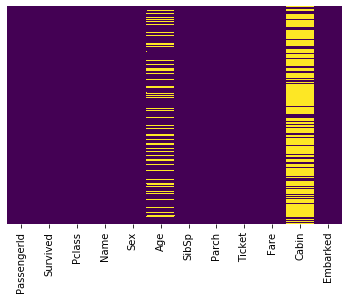

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

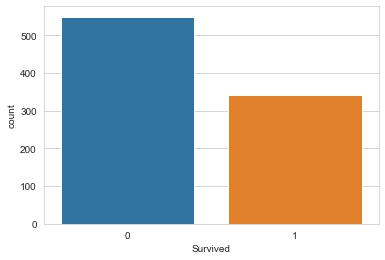

In [7]:
sns.countplot(x='Survived',data=train)

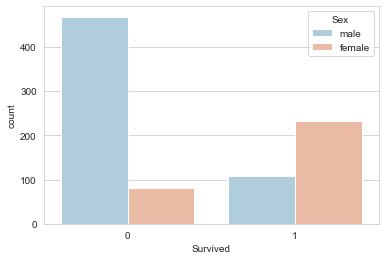

In [8]:
sns.countplot(x='Survived', hue='Sex',data=train, palette='RdBu_r')


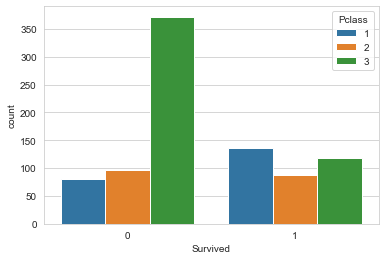

In [9]:
sns.countplot(x='Survived', hue='Pclass',data=train)

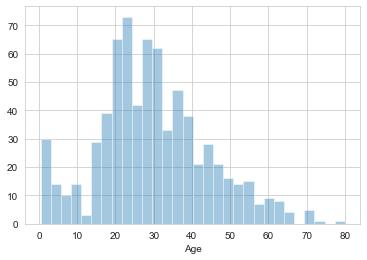

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

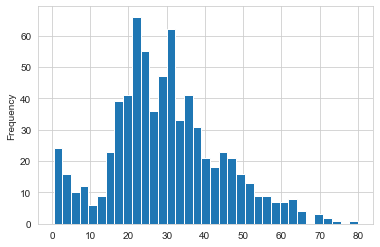

In [11]:
train['Age'].plot.hist(bins=35)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


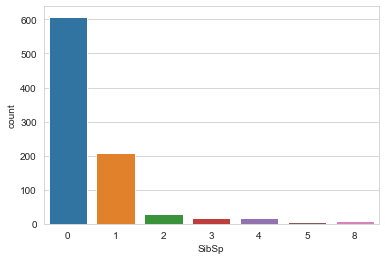

In [13]:
sns.countplot(x='SibSp', data=train)

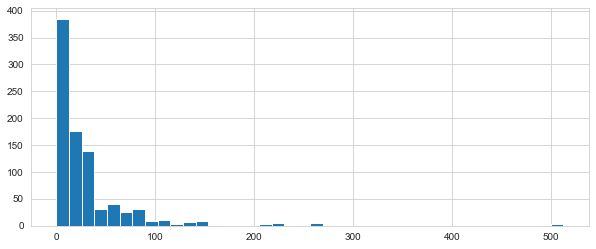

In [14]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [15]:
train['Fare']

0        7.2500
1       71.2833
2        7.9250
3       53.1000
4        8.0500
5        8.4583
6       51.8625
7       21.0750
8       11.1333
9       30.0708
10      16.7000
11      26.5500
12       8.0500
13      31.2750
14       7.8542
15      16.0000
16      29.1250
17      13.0000
18      18.0000
19       7.2250
20      26.0000
21      13.0000
22       8.0292
23      35.5000
24      21.0750
25      31.3875
26       7.2250
27     263.0000
28       7.8792
29       7.8958
         ...   
861     11.5000
862     25.9292
863     69.5500
864     13.0000
865     13.0000
866     13.8583
867     50.4958
868      9.5000
869     11.1333
870      7.8958
871     52.5542
872      5.0000
873      9.0000
874     24.0000
875      7.2250
876      9.8458
877      7.8958
878      7.8958
879     83.1583
880     26.0000
881      7.8958
882     10.5167
883     10.5000
884      7.0500
885     29.1250
886     13.0000
887     30.0000
888     23.4500
889     30.0000
890      7.7500
Name: Fare, Length: 891,

In [16]:
#Cleaning data      

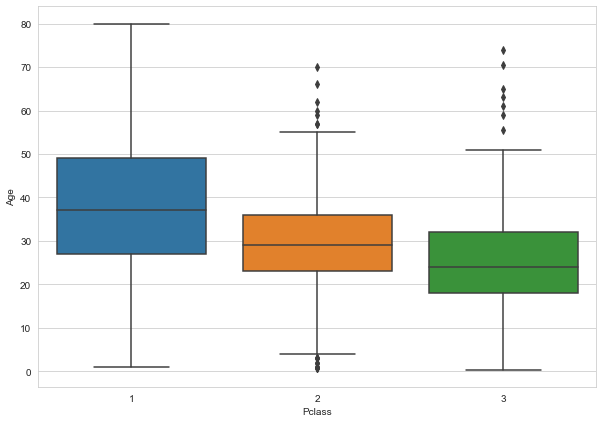

In [17]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train)

In [18]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [19]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

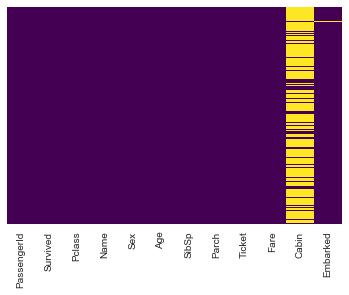

In [20]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
train.drop('Cabin',axis=1, inplace= True)

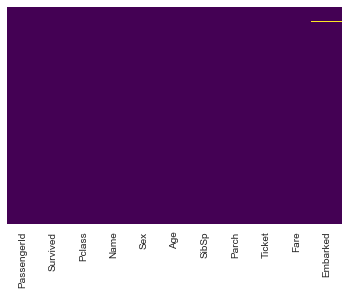

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [23]:
train.dropna( inplace= True)


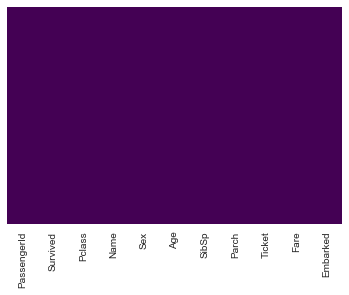

In [24]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [25]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [26]:
sex

male
0       1
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       0
9       0
10      0
11      0
12      1
13      1
14      0
15      0
16      1
17      1
18      0
19      0
20      1
21      1
22      0
23      1
24      0
25      0
26      1
27      1
28      0
29      1
..    ...
861     1
862     0
863     0
864     1
865     0
866     0
867     1
868     1
869     1
870     1
871     0
872     1
873     1
874     0
875     0
876     1
877     1
878     1
879     0
880     0
881     1
882     0
883     1
884     1
885     0
886     1
887     0
888     0
889     1
890     1

[889 rows x 1 columns]

In [27]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [28]:
embark

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
5    1  0
6    0  1
7    0  1
8    0  1
9    0  0
10   0  1
11   0  1
12   0  1
13   0  1
14   0  1
15   0  1
16   1  0
17   0  1
18   0  1
19   0  0
20   0  1
21   0  1
22   1  0
23   0  1
24   0  1
25   0  1
26   0  0
27   0  1
28   1  0
29   0  1
..  .. ..
861  0  1
862  0  1
863  0  1
864  0  1
865  0  1
866  0  0
867  0  1
868  0  1
869  0  1
870  0  1
871  0  1
872  0  1
873  0  1
874  0  0
875  0  0
876  0  1
877  0  1
878  0  1
879  0  0
880  0  1
881  0  1
882  0  1
883  0  1
884  0  1
885  1  0
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[889 rows x 2 columns]

In [29]:
train = pd.concat([train,sex,embark],axis=1)

In [30]:
train.head(2)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Embarked  male  Q  S  
0      0  A/5 21171   7.2500        S     1  0  1  
1      0   PC 17599  71.2833        C     0  0  0

In [31]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1, inplace= True)

In [32]:
train.head(2)

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0

In [33]:
train.drop('PassengerId',axis=1,inplace=True)

In [34]:
train.head(2)



Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0         0       3  22.0      1      0   7.2500     1  0  1
1         1       1  38.0      1      0  71.2833     0  0  0

In [35]:
#test with get dummies to Pclass

In [36]:
X=train.drop('Survived',axis=1)
y= train['Survived']

In [37]:
from sklearn.model_selection import train_test_split


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.30, random_state=101)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
logmodel= LogisticRegression()

In [44]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
predictions = logmodel.predict(X_test)

In [50]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [46]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test,predictions))

precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267



In [48]:
from sklearn.metrics import confusion_matrix

In [49]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]], dtype=int64)